<h2> Importing all the necessary libraries

In [1]:
!pip install visualkeras #used for making the structure of the neural model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 13.3 MB/s eta 0:00:0000:010:01


<h2>Importing all the libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import warnings
import visualkeras
warnings.filterwarnings('ignore') 

2024-07-28 13:09:02.887666: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 13:09:02.887814: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 13:09:03.041561: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<h2>Loading the dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(f'The shape of train_images is {train_images.shape}')
print(f'The shape of train_labels is {train_labels.shape}')
print(f'The shape of test_images is {test_images.shape}')
print(f'The shape of test_labels is {test_labels.shape}')

The shape of train_images is (60000, 28, 28)
The shape of train_labels is (60000,)
The shape of test_images is (10000, 28, 28)
The shape of test_labels is (10000,)


<h2>All the unique images

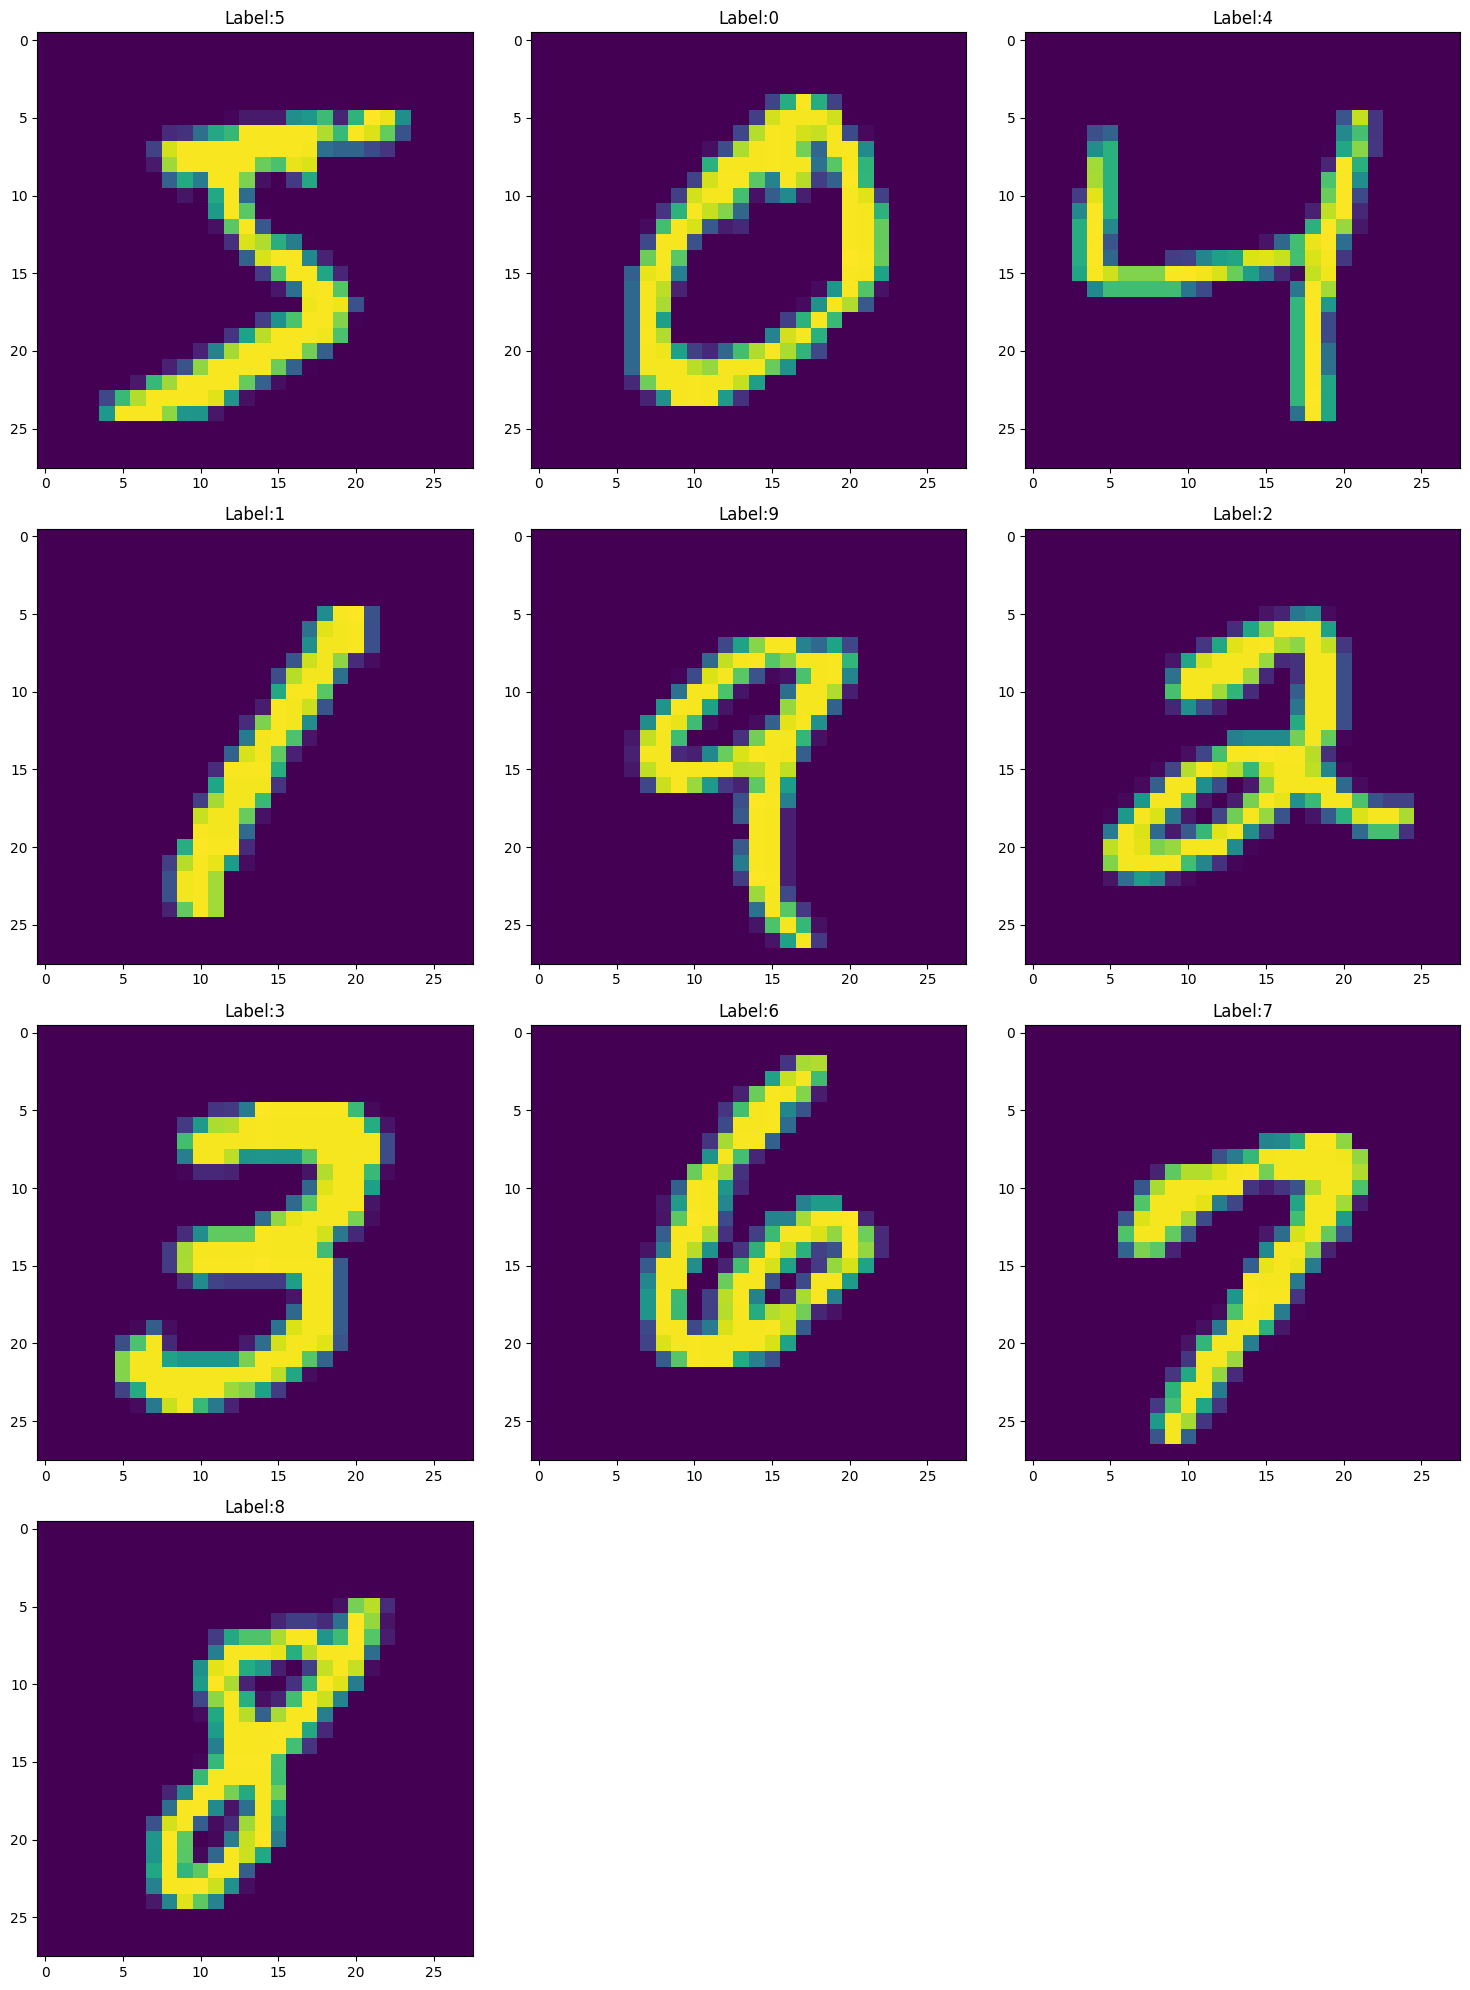

In [5]:
unique_label = []
for i in train_labels:
    if i not in unique_label:
        unique_label.append(i)
num_images = len(unique_label)
num_cols = 3
num_rows = (num_images // num_cols) + (1 if num_images %num_cols else 0)

plt.figure(figsize = (15, num_rows * 5))

for idx, label in enumerate(unique_label):
    plt.subplot(num_rows, num_cols, idx + 1)
    first_occ = np.where(train_labels == label)[0][0]
    plt.imshow(train_images[first_occ])
    plt.title(f'Label:{label}')
    
plt.tight_layout()
plt.show()
del unique_label, num_images, num_cols, num_rows

<h2>Reshaping the images

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


In [7]:
train_images = train_images/255
test_images = test_images/255

In [8]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [9]:
model = models.Sequential([
    layers.Input(shape = (28, 28, 1)),
    layers.Conv2D(6, kernel_size = (5, 5), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Conv2D(16, kernel_size = (5, 5), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation = 'relu'),
    layers.Dense(84, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation = 'softmax'),
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

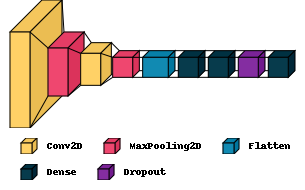

In [10]:
visualkeras.layered_view(model, legend = True)
#it is used for getting the layerd view of the model

In [11]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 5, min_lr = 1e-6)  

<h2> Training for the model

In [13]:
history = model.fit(train_images, train_labels, epochs = 50, validation_data = (test_images, test_labels), callbacks = [early_stopping, reduce_lr], batch_size = 128)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7152 - loss: 0.8804 - val_accuracy: 0.9693 - val_loss: 0.0989 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9589 - loss: 0.1439 - val_accuracy: 0.9823 - val_loss: 0.0590 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9732 - loss: 0.0966 - val_accuracy: 0.9846 - val_loss: 0.0470 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9790 - loss: 0.0739 - val_accuracy: 0.9866 - val_loss: 0.0415 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9839 - loss: 0.0600 - val_accuracy: 0.9880 - val_loss: 0.0385 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9851 - loss: 0.0517 - val_accuracy: 0.9887 - val_loss: 0.0347 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9878 - l

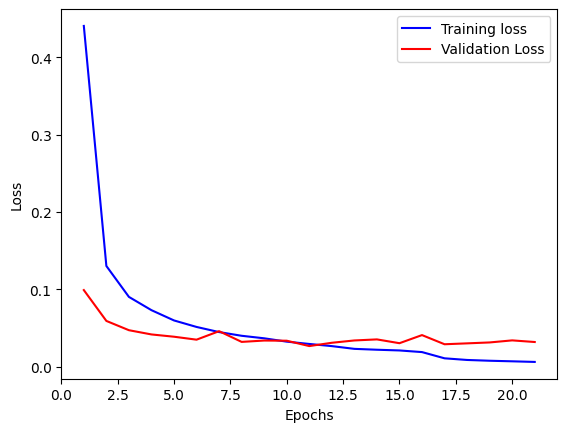

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
del loss, val_loss

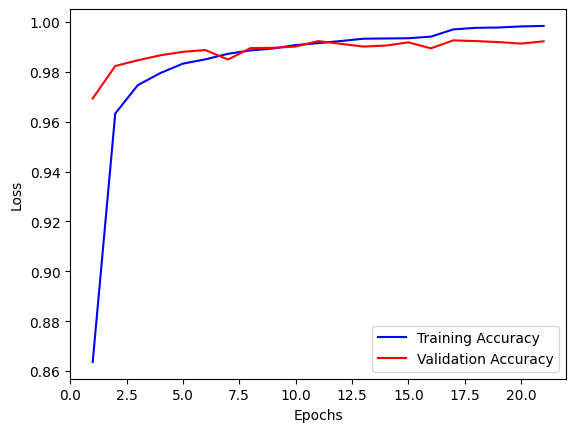

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
del acc, val_acc, epochs

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'The test loss is {test_loss}')
print(f'The accuracy of the model is {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9898 - loss: 0.0344
The test loss is 0.026434682309627533
The accuracy of the model is 0.9922999739646912


In [17]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


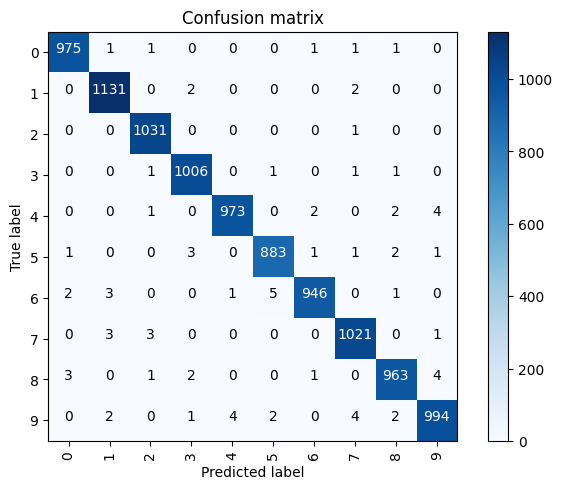

In [18]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(test_images)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(test_labels, axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plot_confusion_matrix(confusion_mtx, 
            classes = ['0','1','2','3','4','5','6','7','8','9'])